<a href="https://colab.research.google.com/github/vedricopane/DataScience-AnalisaProduk/blob/main/DataScience_Analisa_Produk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Connect ke googledrive :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Load data :

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Project/Data Science/Online Retail.xlsx', sheet_name='Online Retail')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Terdapat 541909 baris data dan 8 kolom variabel/feature.

df.shape

(541909, 8)

# **Product Analytics**

## **Quantity Distribution**

Dilakukan untuk mengetahui banyaknya produk yang terjual.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

* **Plot Quantity Distribution :**

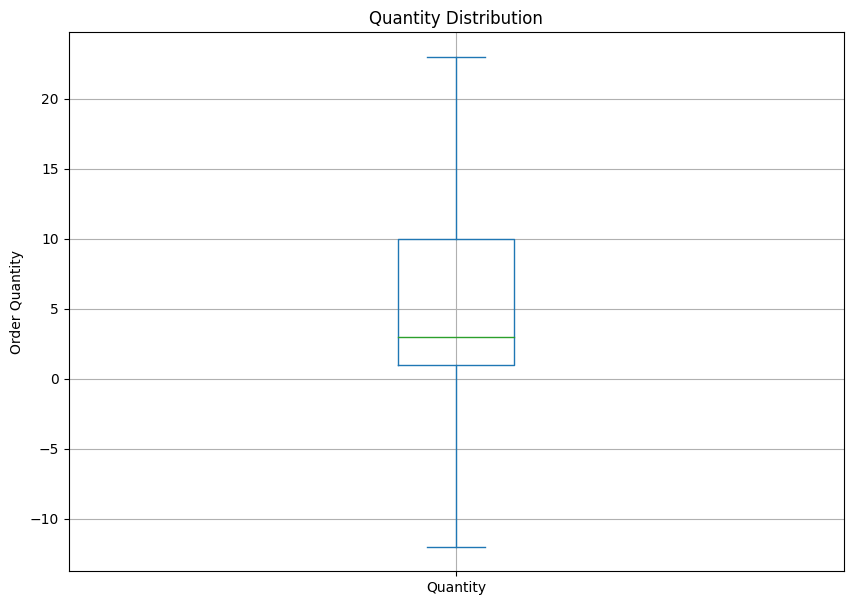

In [ ]:
# Menggunakan plot/grafik untuk mengetahui berapa banyak produk tersebut terjual.

ax = df['Quantity'].plot.box(showfliers=False, grid=True, figsize=(10,7))
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()


*insight

Pada grafik di atas bahwa :

1. Jumlah barang terjual pada range (**< -10 buah sampai > 20 buah**)
2. Jumlah paling banyak barang terjual pada range (**> 0 buah sampai 10 buah**).
3. Terdapat range jumlah barang terjual < -10 buah yang bisa disebabkan konsumen melakukan cancel/refund dan akan menyingkirkan data transaksi tersebut karena pada transaksi tidak mungkin barang terjual minus.

In [ ]:
# Melihat deskripsi data pada kolom 'Quantity'.

pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [ ]:
# Mencari data dengan jumlah barang terjual di atas 0.

df.loc[df['Quantity'] > 0].shape

(531285, 8)

*insight

Terdapat 531285 data dengan jumlah barang terjual di atas 0.

In [ ]:
# Melakukan replace data.

df = df.loc[df['Quantity'] > 0]

### **Time-series Number of Orders :**


Menghitung banyaknya invoice number / banyaknya transaksi yang dilakukan setiap bulannya.

In [ ]:
# Mengambil transaksi yang unik dari invoice number (kolom InvoiceNo) untuk setiap bulan.

monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [ ]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

*insight

1. Pada data terdapat 13 bulan transaksi.
2. Terjadi peningkatan jumlah transaksi dari bulan 12 tahun 2010 sampai bulan 11 tahun 2011.
3. Terjadi penurunan signifikan jumlah transaksi pada bulan 12 tahun 2011.

Next :
1. Mencari penyebab terjadi penurunan signifikan tersebut.

* **Grafik jumlah transaksi setiap bulan :**

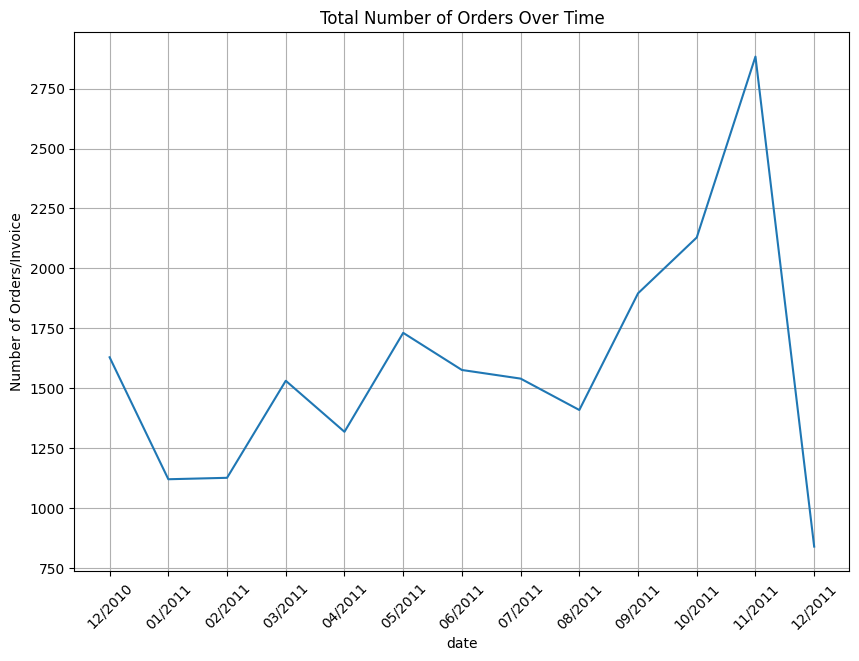

In [ ]:
ax = pd.DataFrame(monthly_orders_df.values).plot(grid=True, figsize=(10,7), legend=False)
ax.set_xlabel('date')
ax.set_ylabel('Number of Orders/Invoice')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(range(len(monthly_orders_df.index)), [x.strftime('%m/%Y') for x in monthly_orders_df.index], rotation=45)
plt.show()

*insight

1. Terdapat kenaikan signifikan penjualan dari bulan 8 tahun 2011 sampai bulan 11 tahun 2011.
2. Terdapat penurunan signifikan penjualan pada bulan 12 tahun 2011.

Next:
1. Mencari tahu produk apa yang paling banyak diminati pada kenaikan signifikan tersebut.
2. Mencari tahu kendala pada data di bulan 12 tahun 2011.

In [ ]:
# Mengambil data pada bulan 12 tahun 2011.

invoice_dates = df.loc[df['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']

In [ ]:
invoice_dates

516403   2011-12-01 08:33:00
516404   2011-12-01 08:33:00
516405   2011-12-01 08:33:00
516406   2011-12-01 08:33:00
516407   2011-12-01 08:33:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 25135, dtype: datetime64[ns]

In [ ]:
# Menampilkan tanggal terendah dan terbesar pada transaksi.

print('Min date : %s\nMax date : %s' % (invoice_dates.min(), invoice_dates.max()))

Min date : 2011-12-01 08:33:00
Max date : 2011-12-09 12:50:00


*insight

1. Terjadi penurunan signifikan karena data tidak penuh selama 1 bulan, hanya data tanggal 1 sampai tanggal 9.

In [ ]:
# Melihat jumlah transaksi di bawah bulan 12 tahun 2011 yaitu 506150 transaksi.

df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

Data yang akan digunakan ialah data di bawah bulan 12 tahun 2011.

In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
# Mengambil transaksi yang unik dari invoice number (kolom InvoiceNo) untuk setiap bulan.

monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [ ]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

* **Grafik jumlah transaksi setiap bulan :**

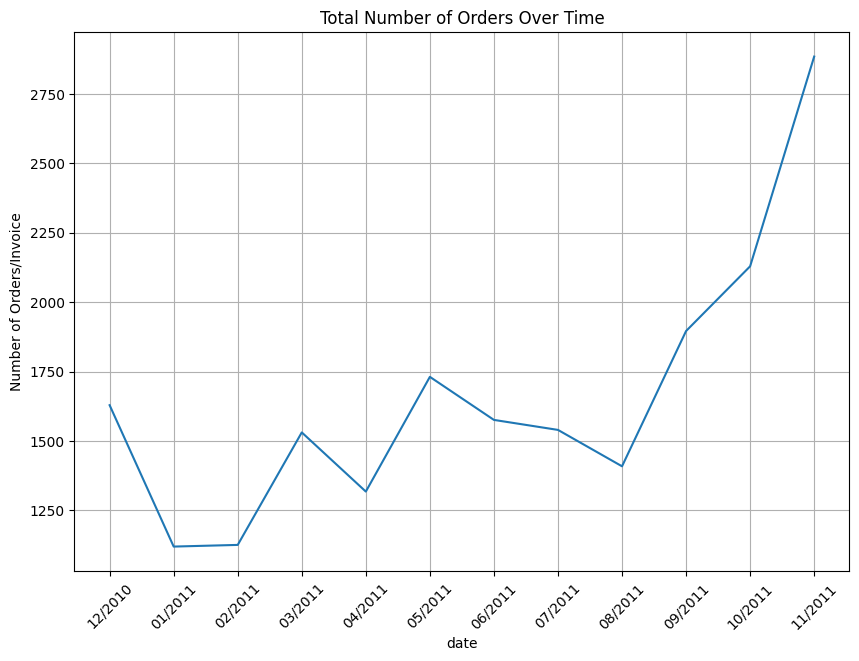

In [ ]:
ax = pd.DataFrame(monthly_orders_df.values).plot(grid=True, figsize=(10,7), legend=False)
ax.set_xlabel('date')
ax.set_ylabel('Number of Orders/Invoice')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(range(len(monthly_orders_df.index)), [x.strftime('%m/%Y') for x in monthly_orders_df.index], rotation=45)
plt.show()

*insight

1. Pergerakan grafik lebih bagus.
2. Terdapat kenaikan signifikan pada bulan 9 tahun 2011 sampai bulan 11 tahun 2011.

### **Time-series Revenue :**

Menghitung banyaknya keuntungan dari penjualan yang didapat setiap bulan.

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Mengambil transaksi yang unik dari keuntungan (kolom Sales) untuk setiap bulan.

monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [ ]:
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

* **Grafik penghasilan setiap bulan :**

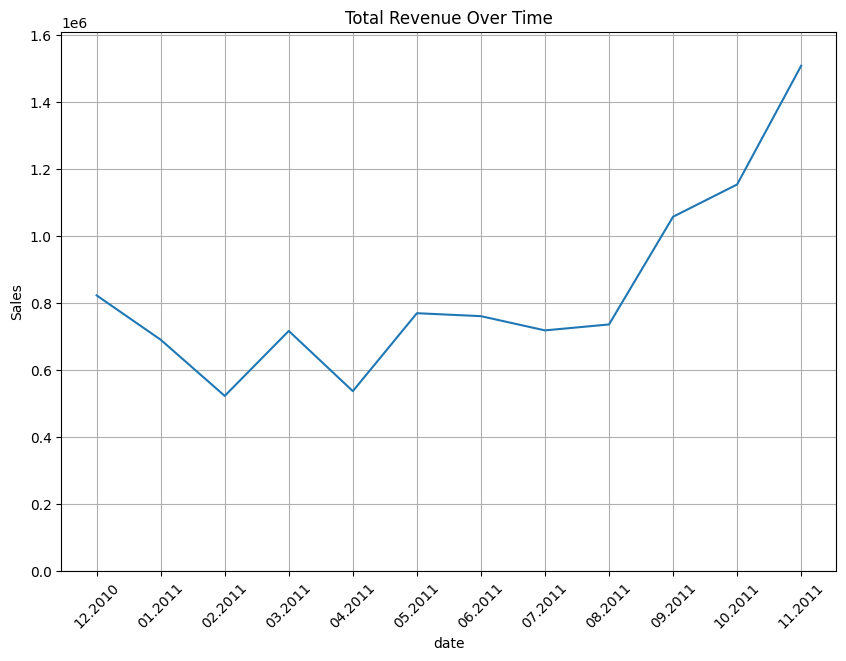

In [ ]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(grid=True, figsize=(10,7), legend=False)
ax.set_xlabel('date')
ax.set_ylabel('Sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

plt.xticks(range(len(monthly_revenue_df.index)), [x.strftime('%m.%Y') for x in monthly_revenue_df.index], rotation=45)
plt.show()

*insight

1. Terdapat kenaikan keuntungan yang signifikan pada bulan 9 tahun 2011 sampai bulan 11 tahun 2011.

### **Time-series Repeat Customers**

Menghitung banyaknya konsumen yang selalu melakukan transaksi.

In [ ]:
# Melakukan grouping data customer (kolom CustomerID) berdasarkan tanggal transaksi (kolom InvoiceDate)
# dan nomor transaksi (kolom InvoiceNo) lalu menghitung banyaknya penjualan (kolom Sales), konsumen (CustomerID), dan
# lokasi (kolom Country).

invoice_customer_df = df.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'Sales': sum, 'CustomerID': max, 'Country': max}).reset_index()

In [ ]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [ ]:
# Melakukan filtering dengan mengambil konsumen yang selalu melakukan transaksi dengan
# filtering transaksi yg dilakukannya lebih dari 1 dan diambil datanya unik.
# atau disebut banyak konsumen melakukan transaksi setiap bulannya.

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [ ]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

*insight

1. Bulan paling banyak yg selalu melakukan transaksi yaitu bulan 11 tahun 2011.

In [ ]:
# Menghitung seluruh konsumen yang melakukan transaksi setiap bulannya.

monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [ ]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# Menghitung presentase konsumen yang selalu melakukan transaksi.

monthly_repeat_percentage = monthly_repeat_customers_df / monthly_unique_customers_df * 100

In [ ]:
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

*insight

1. Persentase tertinggi konsumen selalu melakukan transaksi (repeat order) ialah pada bulan 11 tahun 2011 sebesar 32,49 %.

* **Grafik konsumen repeat order setiap bulan :**

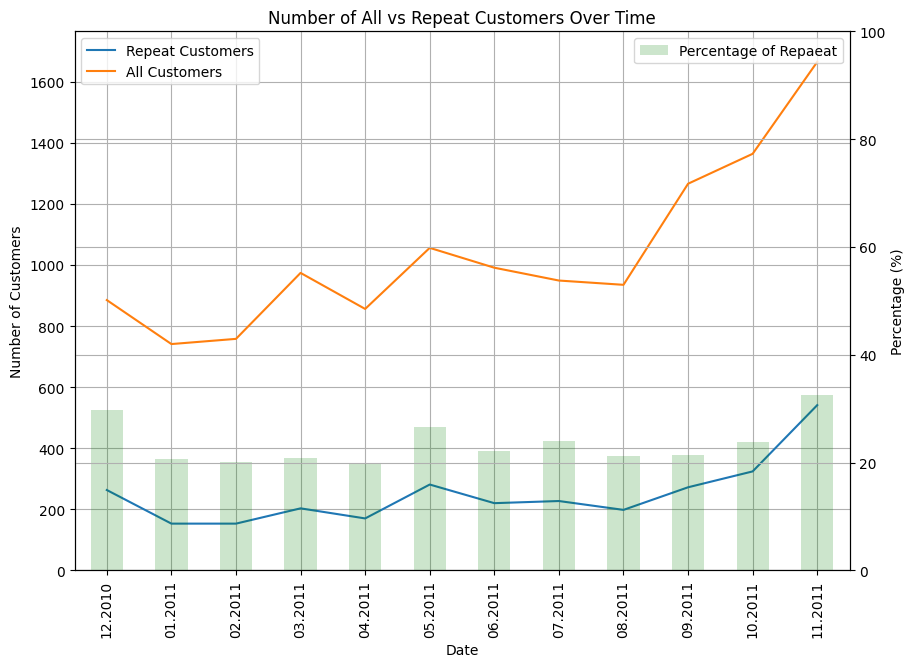

In [ ]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(10,7))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax, grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax, grid=True, secondary_y=True, color='green', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of All vs Repeat Customers Over Time')

ax2.set_ylabel('Percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repaeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max() + 100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)),
 [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

*insight

1. Pada garis grafik All Customers, banyaknya konsumen yg melakukan transaksi.
2. Pada garis grafik Repeat Customers, banyaknya konsumen yg melakukan transaksi berulang.
3. Pada kedua garis grafik, grafik penjualan/transaksi naik pada bulan 8 tahun 2011 sampai bulan 11 tahun 2011.

### **Revenue from Repeat Customers**

Menghitung banyaknya keuntungan yang dihasilkan dari konsumen yg selalu melakukan transaksi/pembelian berulang.

In [ ]:
# Melakukan filtering berdasarkan konsumen (kolom CustomerID) dan menghitung banyaknya penjualannya (kolom Sales)
# pada setiap bulan.

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

<ipython-input-36-75f5733078e2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


In [ ]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

In [ ]:
month_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df / monthly_revenue_df * 100

In [ ]:
month_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

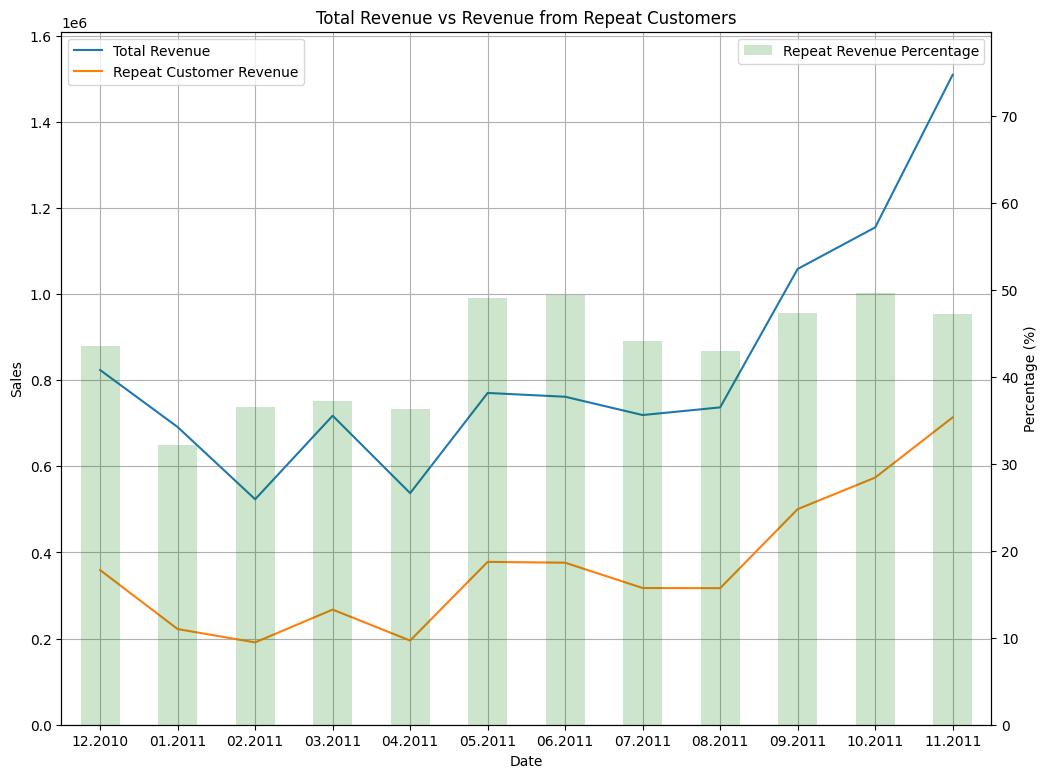

In [ ]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax, grid=True)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Total Revenue vs Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

ax2 = ax.twinx()

pd.DataFrame(month_rev_perc_repeat_customers_df.values).plot(ax=ax2, kind='bar', color='green', alpha=0.2)

ax2.set_ylabel('Percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_ylim([0, max(month_rev_perc_repeat_customers_df.values) + 30])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in month_rev_perc_repeat_customers_df.index])

plt.show()

*insight

1. Garis grafik Total Revenue dipengaruhi atau banyak dihasilkan dari Repeat Customer Revenue.
2. Tingginya nilai Total Revenue dipengaruhi banyaknya transaksi yg dilakukan oleh konsumen berulang dibandingkan konsumen yg baru, sehingga terlihat tajamnya kenaikan grafik dari bulan 8 tahun 2011 sampai bulan 11 tahun 2011.

### **Popular Items Over Time**

Menghitung penjualan produk setiap bulan.

In [ ]:
# Melakukan filtering

date_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum())

In [ ]:
date_item_df.head()

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411

In [ ]:
# Melakukan sorting data berdasarkan penjualan bulan terakhir, dimana sample nya ialah bulan 11 tahun 2011

last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(by='Quantity', ascending=False).reset_index()

In [ ]:
last_month_sorted_df

,StockCode,Quantity
0,23084,14954
1,84826,12551
2,22197,12460
3,22086,7908
4,85099B,5909
...,...,...
2941,84549,1
2942,84527,1
2943,90082B,1
2944,90082D,1


In [ ]:
# Melakukan regroup untuk 5 items teratas.

date_item_df = pd.DataFrame(df.loc[df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])].set_index('InvoiceDate').groupby(
    [pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum())

In [ ]:
date_item_df.head()

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24

*insight

1. Pada bulan 11 tahun 2011 tejadi kenaikkan signifikan penjualan produk tersebut dibandingkan bulan sebelumnya.

In [ ]:
# Melakukan transpose table

trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)

<ipython-input-57-7fa5dee59304>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)


In [ ]:
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


*insight

1. Terjadi peningkatan penjualan dimulau dari bulan 9 tahun 2011 sampai bulan 11 tahun 2011.

* **Grafik perbandingan 5 produk teratas**

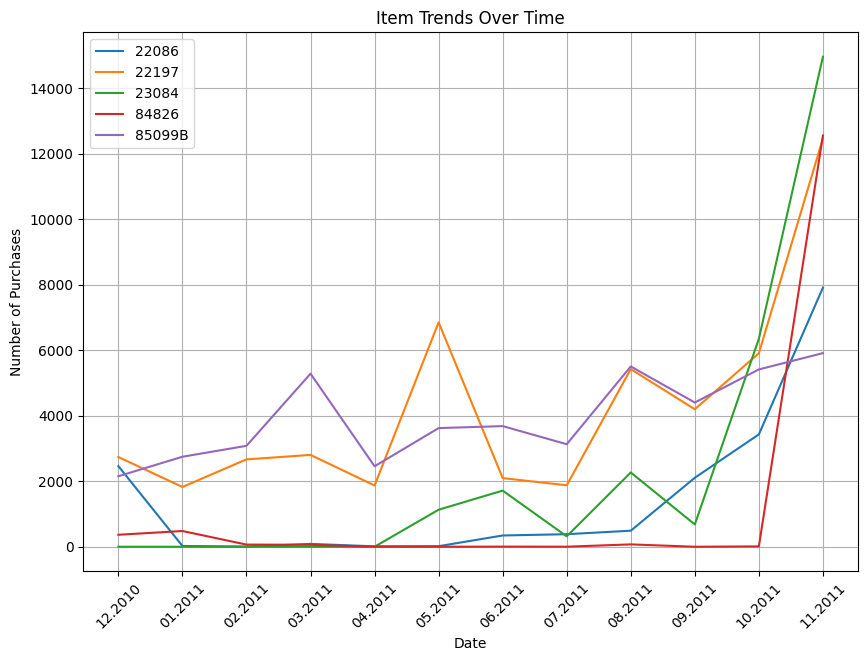

In [ ]:
ax = pd.DataFrame(trending_items_df.values).plot(figsize=(10,7), grid=True)

ax.set_ylabel('Number of Purchases')
ax.set_xlabel('Date')
ax.set_title('Item Trends Over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(range(len(trending_items_df.index)), [x.strftime('%m.%Y') for x in trending_items_df.index], rotation=45)

plt.show()

*insight

1. Produk bergaris grafik hijau (23084) mengalamin kenaikan tajam di bulan 9 tahun 2011.
2. Produk bergaris grafik merah (84826) mengalamin kenaikan tajam di bulan 10 tahun 2011.


NB :
1. Tujuan analisa ini ialah agar kita memfokuskan pada penjualan  dan meningkatkan penjualan di 5 produk ini dan memungkinkan untuk meningkatkan penjualan produk lainnya.
2. Tujuan analisa ini ialah mengetahui kesukaan konsumen terhadap produk yg dijual.
3. Tujuan analisa ini ialah mendapat informasi untuk membangun sistem rekomendasi produk untuk bulan selanjutnya.
3. Produk 22086, 23084, dan 84826 bisa diprioritaskan karena bisa memberi keuntungan bagi penjualan.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
